In [1]:
# Mount Google Drive for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, r2_score


In [3]:
# Load dataset
df = pd.read_csv("/content/drive/MyDrive/AI/2024 QS World University Rankings 1.1 (For qs.com).csv")

# Display the first 5 rows
print("First 5 rows of the dataset:")
display(df.head())

# Check dataset information
print("\nDataset Info:")
print(df.info())

# Check for missing values
print("\nMissing Values in Each Column:")
print(df.isnull().sum())


First 5 rows of the dataset:


,2024 RANK,2023 RANK,Institution Name,Country Code,Country,SIZE,FOCUS,RES.,AGE,STATUS,...,International Faculty Rank,International Students Score,International Students Rank,International Research Network Score,International Research Network Rank,Employment Outcomes Score,Employment Outcomes Rank,Sustainability Score,Sustainability Rank,Overall SCORE
0,rank display,rank display2,institution,location code,location,size,focus,research,age band,status,...,ifr rank,isr score,isr rank,irn score,irn rank,ger score,ger rank,SUS SCORE,SUS RANK,Overall Score
1,1,1,Massachusetts Institute of Technology (MIT),US,United States,M,CO,VH,5,B,...,56,88.2,128,94.3,58,100,4,95.2,51,100.0
2,2,2,University of Cambridge,UK,United Kingdom,L,FC,VH,5,A,...,64,95.8,85,99.9,7,100,6,97.3,33=,99.2
3,3,4,University of Oxford,UK,United Kingdom,L,FC,VH,5,A,...,110,98.2,60,100.0,1,100,3,97.8,26=,98.9
4,4,5,Harvard University,US,United States,L,FC,VH,5,B,...,210,66.8,223,100.0,5,100,1,96.7,39,98.3



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1498 entries, 0 to 1497
Data columns (total 29 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   2024 RANK                             1498 non-null   object
 1   2023 RANK                             1416 non-null   object
 2   Institution Name                      1498 non-null   object
 3   Country Code                          1498 non-null   object
 4   Country                               1498 non-null   object
 5   SIZE                                  1475 non-null   object
 6   FOCUS                                 1497 non-null   object
 7   RES.                                  1411 non-null   object
 8   AGE                                   1472 non-null   object
 9   STATUS                                1456 non-null   object
 10  Academic Reputation Score             1498 non-null   object
 11  Academic Reputa

In [4]:
# Drop rows with missing values
df.dropna(inplace=True)
print("\nMissing values after cleaning:", df.isnull().sum().sum())

# Encode categorical features
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

print("Categorical features encoded.")



Missing values after cleaning: 0
Categorical features encoded.


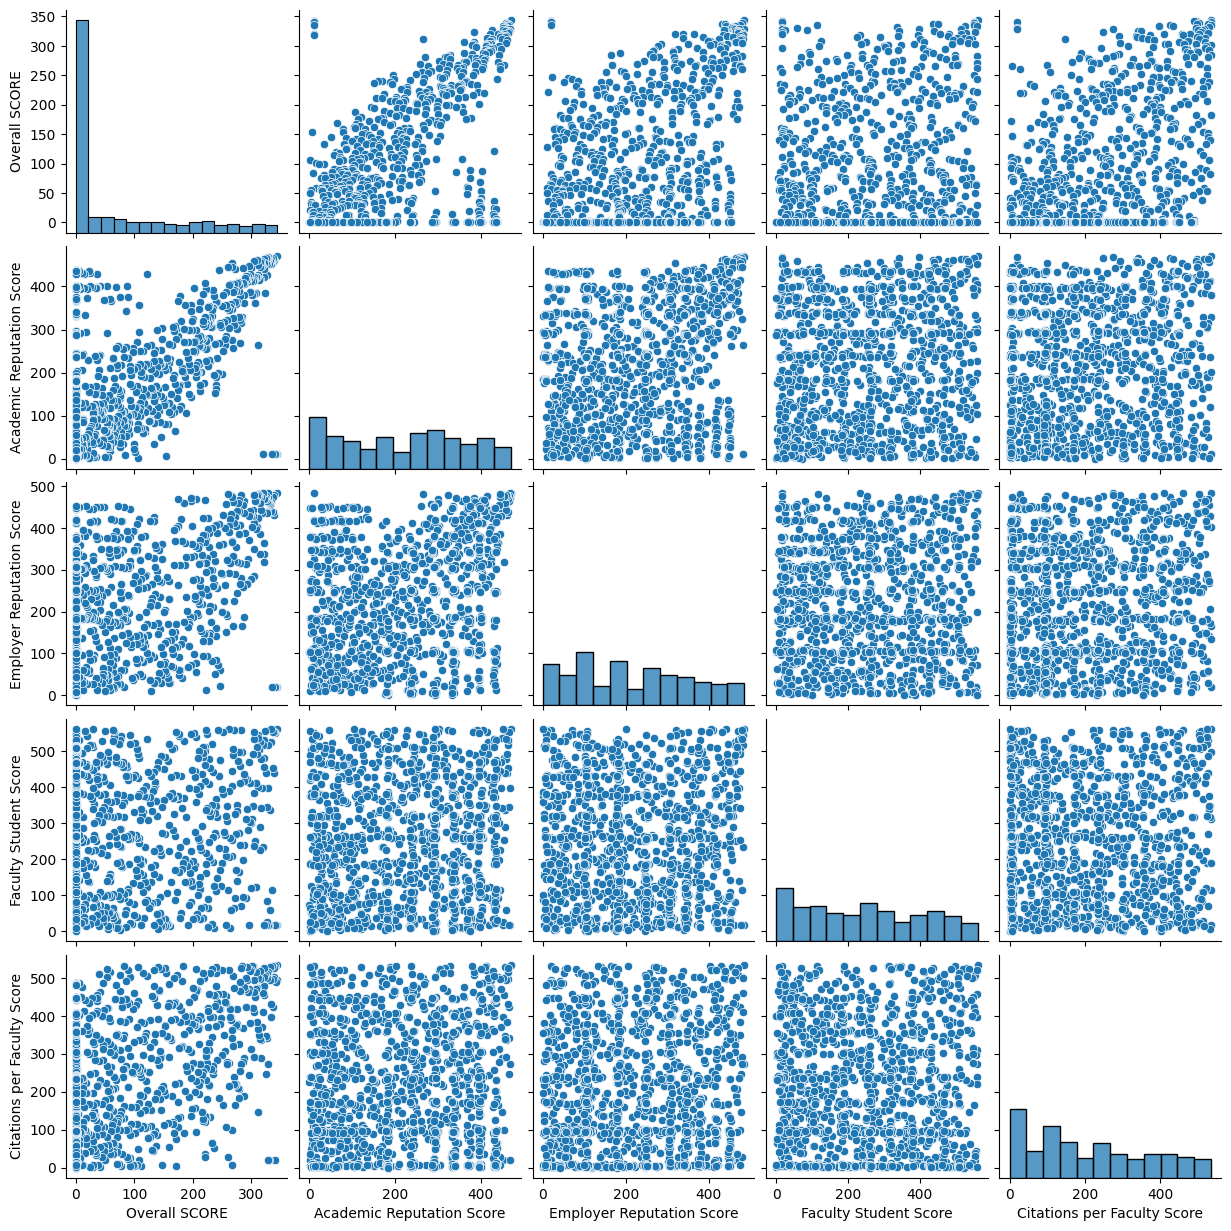

In [6]:
# Pairplot for relationships between numerical features
sns.pairplot(df[['Overall SCORE', 'Academic Reputation Score', 'Employer Reputation Score',
                 'Faculty Student Score', 'Citations per Faculty Score']].dropna())
plt.show()


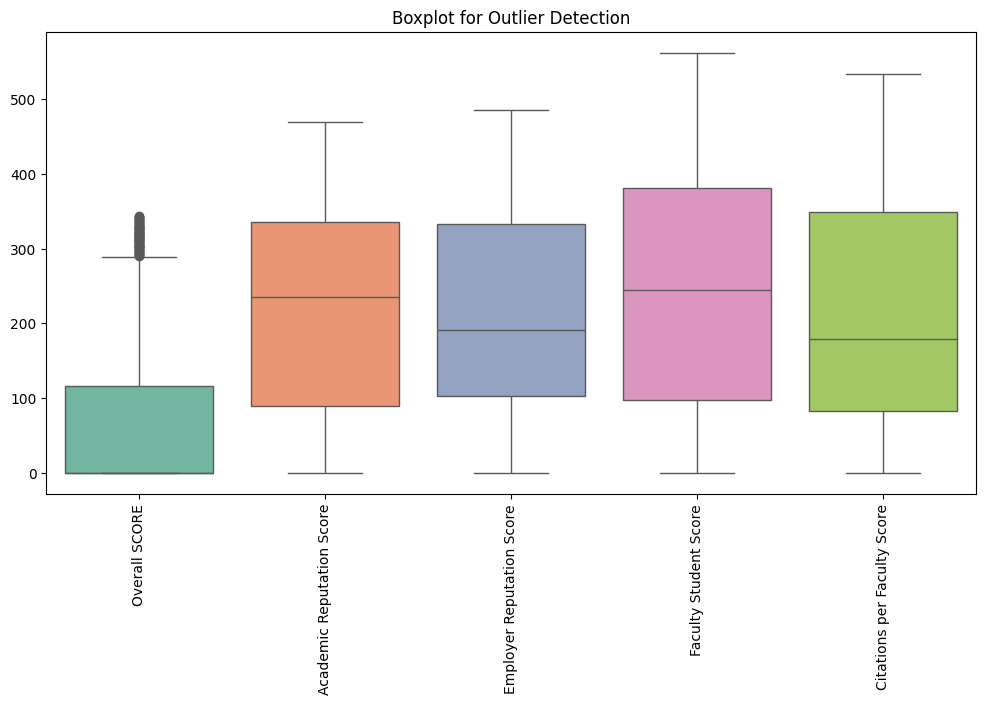

In [7]:
# Boxplot for outlier detection
plt.figure(figsize=(12,6))
sns.boxplot(data=df[['Overall SCORE', 'Academic Reputation Score', 'Employer Reputation Score',
                     'Faculty Student Score', 'Citations per Faculty Score']], palette="Set2")
plt.xticks(rotation=90)
plt.title("Boxplot for Outlier Detection")
plt.show()


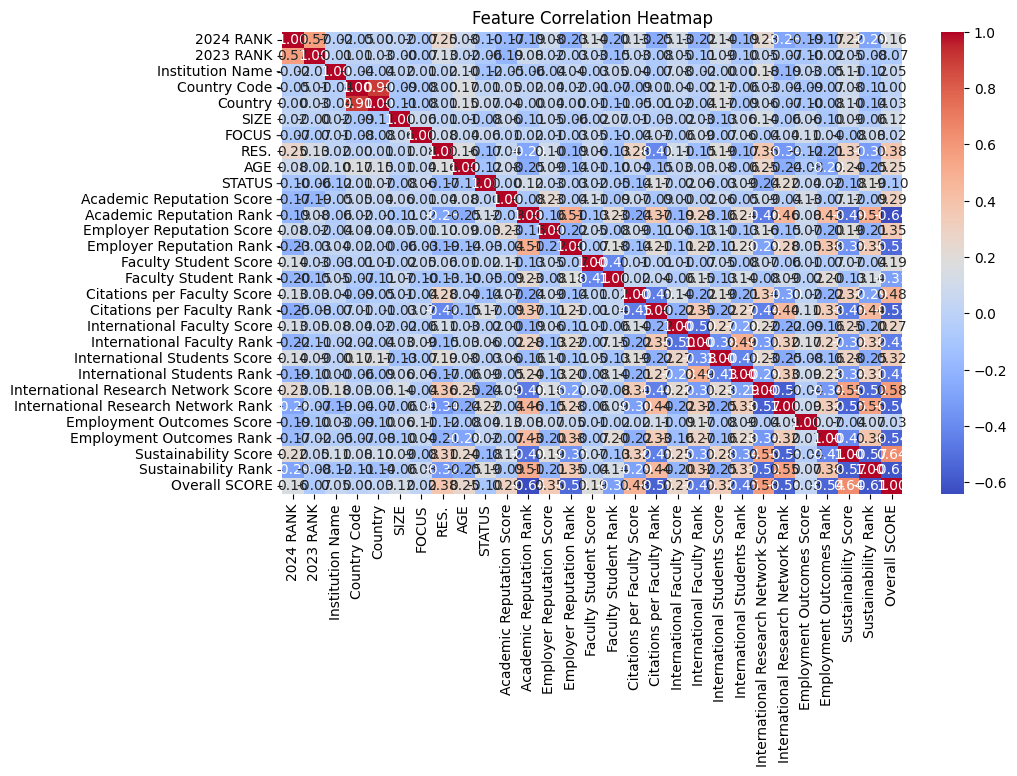

In [8]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


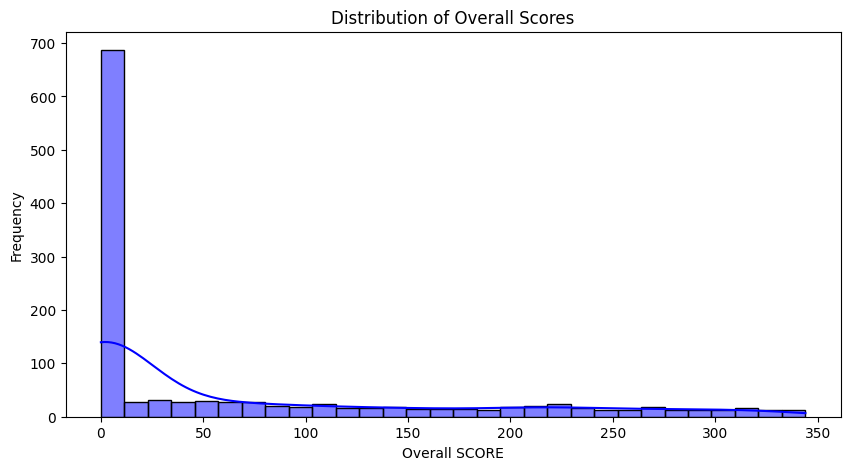

In [9]:
# Histogram of Overall Scores
plt.figure(figsize=(10,5))
sns.histplot(df['Overall SCORE'], bins=30, kde=True, color='blue')
plt.title("Distribution of Overall Scores")
plt.xlabel("Overall SCORE")
plt.ylabel("Frequency")
plt.show()

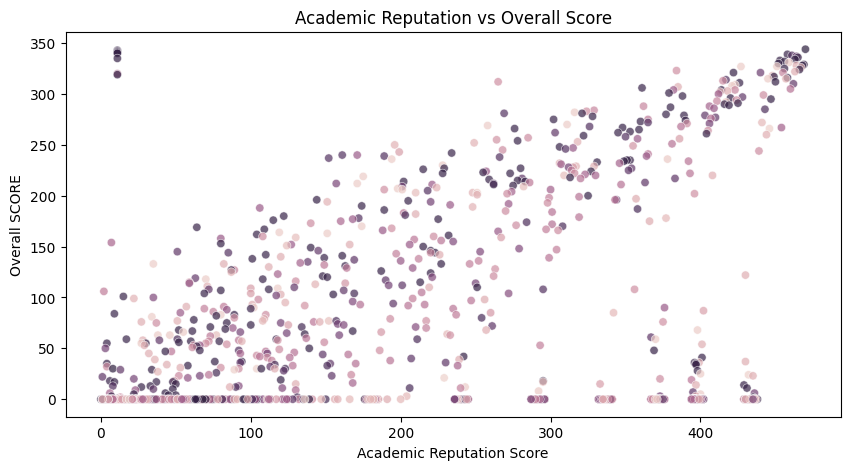

In [10]:
# Scatterplot: Academic Reputation Score vs Overall Score
plt.figure(figsize=(10,5))
sns.scatterplot(x=df['Academic Reputation Score'], y=df['Overall SCORE'], hue=df['Country'], alpha=0.7)
plt.title("Academic Reputation vs Overall Score")
plt.xlabel("Academic Reputation Score")
plt.ylabel("Overall SCORE")
plt.legend([],[], frameon=False)
plt.show()

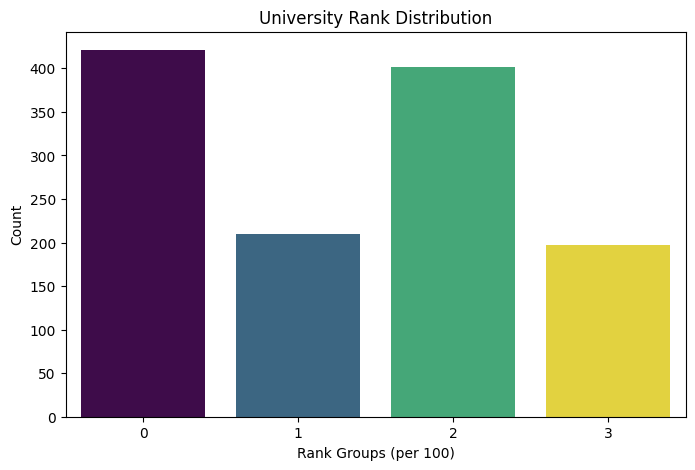

In [12]:
# Countplot: University Rank Distribution
plt.figure(figsize=(8,5))
sns.countplot(x=df['2024 RANK'] // 100, hue=df['2024 RANK'] // 100, palette="viridis", legend=False)
plt.title("University Rank Distribution")
plt.xlabel("Rank Groups (per 100)")
plt.ylabel("Count")
plt.show()

In [13]:
# Classification Task: Categorizing universities into ranking groups

def classify_rank(rank):
    if rank <= 100:
        return "Top 100"
    elif rank <= 500:
        return "100-500"
    else:
        return "500+"

# Apply classification function to 2024 RANK
df["Rank Category"] = df["2024 RANK"].apply(pd.to_numeric, errors='coerce').apply(classify_rank)

# Encode the Rank Category labels
le_rank = LabelEncoder()
df["Rank Category"] = le_rank.fit_transform(df["Rank Category"])

print("Classification target variable (Rank Category) created successfully.")


Classification target variable (Rank Category) created successfully.


In [14]:
# Regression Task: Predicting Overall Score

target_column_regression = "Overall SCORE"
X_regression = df.drop(columns=[target_column_regression])
y_regression = df[target_column_regression]

print("Regression target variable (Overall SCORE) created successfully.")


Regression target variable (Overall SCORE) created successfully.


In [15]:
# Prepare dataset for classification
target_column_classification = "Rank Category"
X_classification = df.drop(columns=[target_column_classification])
y_classification = df[target_column_classification]

print("Classification dataset prepared successfully.")


Classification dataset prepared successfully.


In [16]:
# Split the data into training and testing sets

# Train-Test Split for Regression
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_regression, y_regression, test_size=0.2, random_state=42)

# Train-Test Split for Classification
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_classification, y_classification, test_size=0.2, random_state=42)

print("Train-Test split completed for both classification and regression.")


Train-Test split completed for both classification and regression.


In [17]:
# Standardize features for both classification and regression

scaler = StandardScaler()

# Scale regression data
X_train_reg = scaler.fit_transform(X_train_reg)
X_test_reg = scaler.transform(X_test_reg)

# Scale classification data
X_train_clf = scaler.fit_transform(X_train_clf)
X_test_clf = scaler.transform(X_test_clf)

print("Feature scaling completed for classification and regression.")


Feature scaling completed for classification and regression.


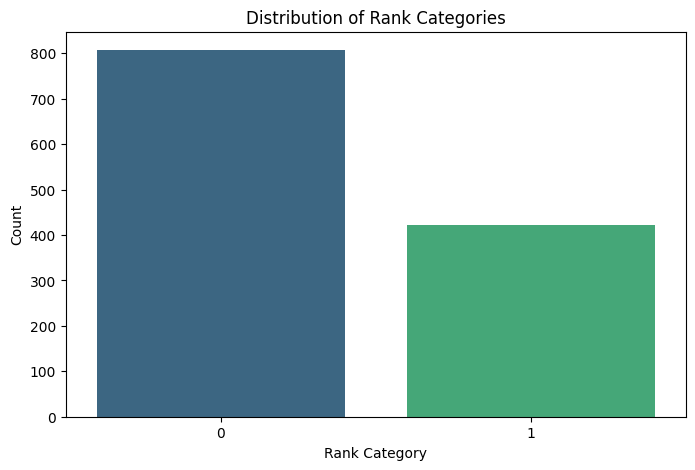

In [19]:
# Countplot of Rank Categories ( help analyze class distribution and important features)
plt.figure(figsize=(8,5))
sns.countplot(x=df["Rank Category"], hue=df["Rank Category"], palette="viridis", legend=False)
plt.title("Distribution of Rank Categories")
plt.xlabel("Rank Category")
plt.ylabel("Count")
plt.show()


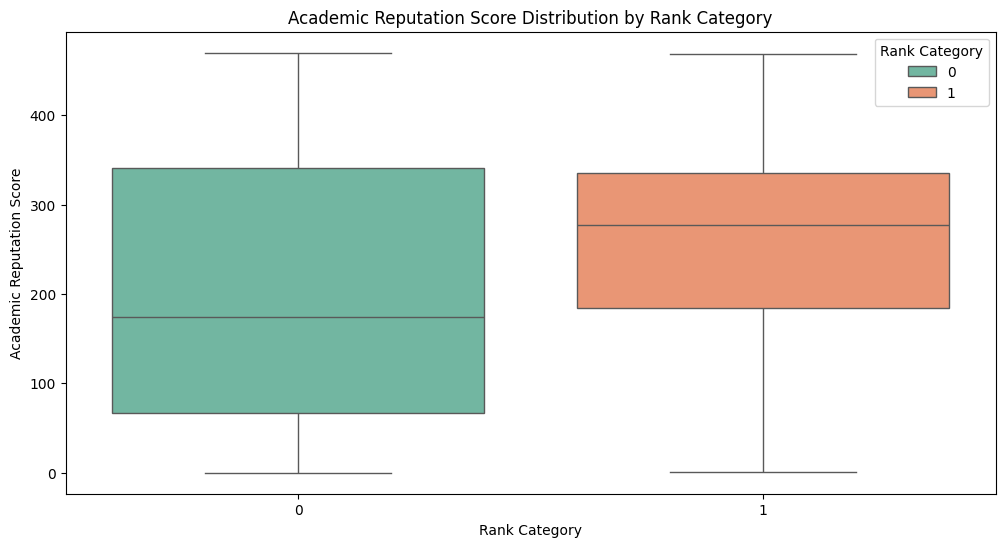

In [21]:

plt.figure(figsize=(12,6))
sns.boxplot(x=df["Rank Category"], y=df["Academic Reputation Score"], hue=df["Rank Category"], palette="Set2", dodge=False)
plt.title("Academic Reputation Score Distribution by Rank Category")
plt.xlabel("Rank Category")
plt.ylabel("Academic Reputation Score")
plt.show()


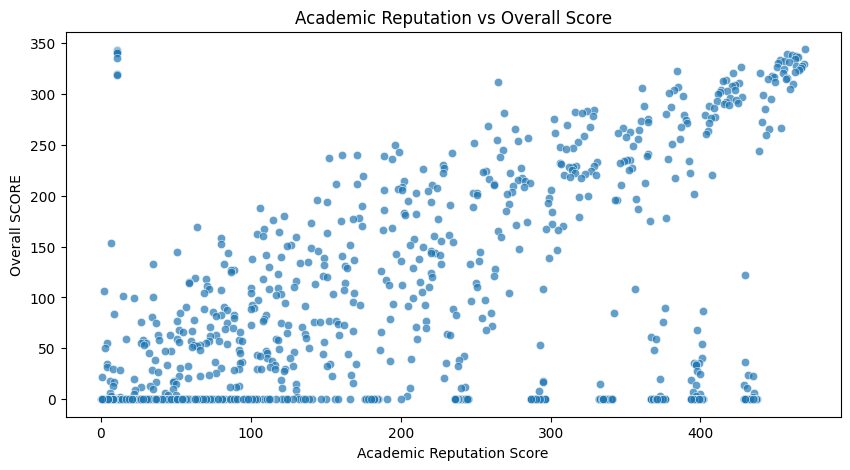

In [22]:
# Scatterplot: Academic Reputation vs Overall Score
plt.figure(figsize=(10,5))
sns.scatterplot(x=df['Academic Reputation Score'], y=df['Overall SCORE'], alpha=0.7)
plt.title("Academic Reputation vs Overall Score")
plt.xlabel("Academic Reputation Score")
plt.ylabel("Overall SCORE")
plt.show()


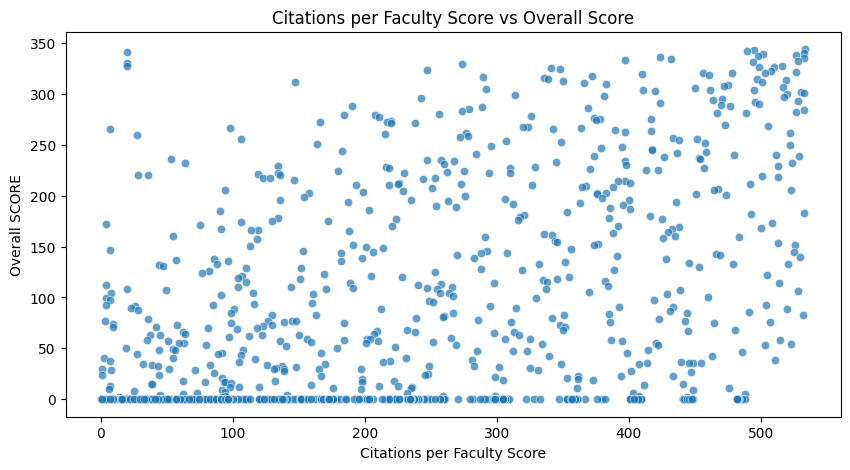

In [23]:
#Scatterplot: Citations per Faculty Score vs Overall Score
plt.figure(figsize=(10,5))
sns.scatterplot(x=df['Citations per Faculty Score'], y=df['Overall SCORE'], alpha=0.7)
plt.title("Citations per Faculty Score vs Overall Score")
plt.xlabel("Citations per Faculty Score")
plt.ylabel("Overall SCORE")
plt.show()


Classification Models

In [24]:
# Train and evaluate classification models

# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train_clf, y_train_clf)
y_pred_log = log_reg.predict(X_test_clf)

print("Logistic Regression Accuracy:", accuracy_score(y_test_clf, y_pred_log))
print("Classification Report:\n", classification_report(y_test_clf, y_pred_log))

# Decision Tree Classifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train_clf, y_train_clf)
y_pred_tree = decision_tree.predict(X_test_clf)

print("\nDecision Tree Accuracy:", accuracy_score(y_test_clf, y_pred_tree))
print("Classification Report:\n", classification_report(y_test_clf, y_pred_tree))

# Random Forest Classifier
random_forest = RandomForestClassifier()
random_forest.fit(X_train_clf, y_train_clf)
y_pred_forest = random_forest.predict(X_test_clf)

print("\nRandom Forest Accuracy:", accuracy_score(y_test_clf, y_pred_forest))
print("Classification Report:\n", classification_report(y_test_clf, y_pred_forest))


Logistic Regression Accuracy: 0.9878048780487805
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       162
           1       0.97      1.00      0.98        84

    accuracy                           0.99       246
   macro avg       0.98      0.99      0.99       246
weighted avg       0.99      0.99      0.99       246


Decision Tree Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       162
           1       1.00      1.00      1.00        84

    accuracy                           1.00       246
   macro avg       1.00      1.00      1.00       246
weighted avg       1.00      1.00      1.00       246


Random Forest Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       162
           1       1.00      1.00      1.00        84

   

Regression Models


In [25]:
# Train and evaluate regression models

# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train_reg, y_train_reg)
y_pred_lin = lin_reg.predict(X_test_reg)

print("Linear Regression Performance:")
print("MSE:", mean_squared_error(y_test_reg, y_pred_lin))
print("R2 Score:", r2_score(y_test_reg, y_pred_lin))

# Decision Tree Regressor
decision_tree_reg = DecisionTreeRegressor()
decision_tree_reg.fit(X_train_reg, y_train_reg)
y_pred_tree_reg = decision_tree_reg.predict(X_test_reg)

print("\nDecision Tree Regression Performance:")
print("MSE:", mean_squared_error(y_test_reg, y_pred_tree_reg))
print("R2 Score:", r2_score(y_test_reg, y_pred_tree_reg))

# Random Forest Regressor
random_forest_reg = RandomForestRegressor()
random_forest_reg.fit(X_train_reg, y_train_reg)
y_pred_forest_reg = random_forest_reg.predict(X_test_reg)

print("\nRandom Forest Regression Performance:")
print("MSE:", mean_squared_error(y_test_reg, y_pred_forest_reg))
print("R2 Score:", r2_score(y_test_reg, y_pred_forest_reg))


Linear Regression Performance:
MSE: 1781.5465254412545
R2 Score: 0.8102721896082417

Decision Tree Regression Performance:
MSE: 647.0081300813008
R2 Score: 0.9310961380615154

Random Forest Regression Performance:
MSE: 666.8631012195121
R2 Score: 0.9289816604738411


Visualize Classification and Regression Results

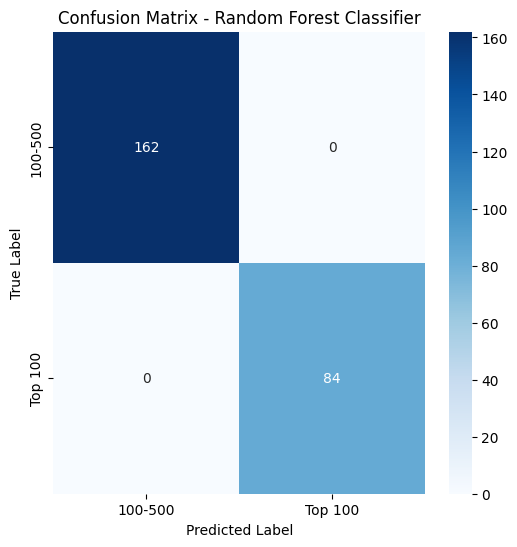

In [26]:
from sklearn.metrics import confusion_matrix

# Confusion Matrix for Random Forest Classifier
cm = confusion_matrix(y_test_clf, y_pred_forest)

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le_rank.classes_, yticklabels=le_rank.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Random Forest Classifier")
plt.show()


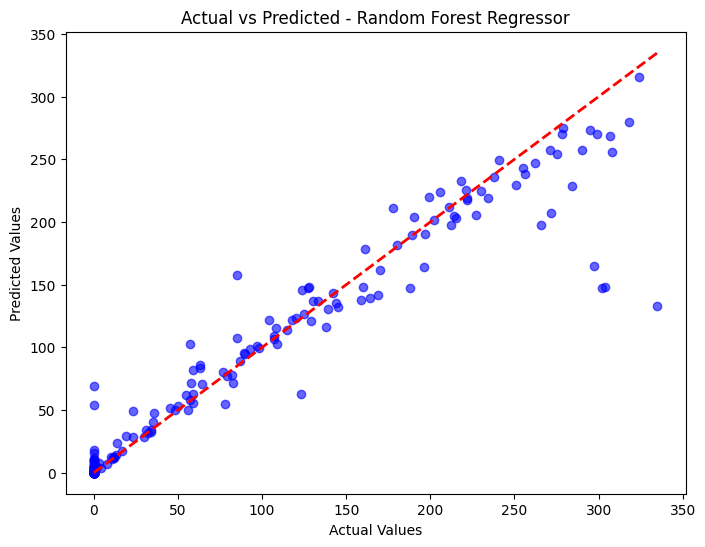

In [27]:
# Scatter plot of actual vs predicted values for Random Forest Regressor
plt.figure(figsize=(8,6))
plt.scatter(y_test_reg, y_pred_forest_reg, alpha=0.6, color="blue")
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], '--r', linewidth=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted - Random Forest Regressor")
plt.show()


Hyperparameter Tuning for Classification Models

In [28]:
# Define hyperparameter grids for classification
param_grid_clf = {
    'LogisticRegression': {'C': [0.1, 1, 10]},
    'DecisionTreeClassifier': {'max_depth': [3, 5, 10]},
    'RandomForestClassifier': {'n_estimators': [50, 100, 200]}
}

best_models_clf = {}

# Perform GridSearchCV for each classification model
for name, model in [('LogisticRegression', LogisticRegression()),
                     ('DecisionTreeClassifier', DecisionTreeClassifier()),
                     ('RandomForestClassifier', RandomForestClassifier())]:
    grid_search = GridSearchCV(model, param_grid_clf[name], cv=5, scoring='accuracy')
    grid_search.fit(X_train_clf, y_train_clf)
    best_models_clf[name] = grid_search.best_estimator_
    print(f"Best parameters for {name}: {grid_search.best_params_}")


Best parameters for LogisticRegression: {'C': 1}
Best parameters for DecisionTreeClassifier: {'max_depth': 3}
Best parameters for RandomForestClassifier: {'n_estimators': 50}


Hyperparameter Tuning for Regression Models

In [29]:
# Define hyperparameter grids for regression
param_grid_reg = {
    'DecisionTreeRegressor': {'max_depth': [3, 5, 10]},
    'RandomForestRegressor': {'n_estimators': [50, 100, 200]}
}

best_models_reg = {}

# Perform GridSearchCV for each regression model
for name, model in [('DecisionTreeRegressor', DecisionTreeRegressor()),
                     ('RandomForestRegressor', RandomForestRegressor())]:
    grid_search = GridSearchCV(model, param_grid_reg[name], cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train_reg, y_train_reg)
    best_models_reg[name] = grid_search.best_estimator_
    print(f"Best parameters for {name}: {grid_search.best_params_}")


Best parameters for DecisionTreeRegressor: {'max_depth': 10}
Best parameters for RandomForestRegressor: {'n_estimators': 50}


Feature Selection for Classification Task


In [31]:
from sklearn.feature_selection import RFE

# Feature Selection using Recursive Feature Elimination (RFE) for Classification
rfe_clf = RFE(LogisticRegression(), n_features_to_select=5)
rfe_clf.fit(X_train_clf, y_train_clf)

# Get selected features
selected_features_clf = X_classification.columns[rfe_clf.support_]
print("Selected Features for Classification:", selected_features_clf.tolist())


Selected Features for Classification: ['2024 RANK', '2023 RANK', 'Country Code', 'Country', 'Faculty Student Score']


Bar Plot: Feature Importance for Classification

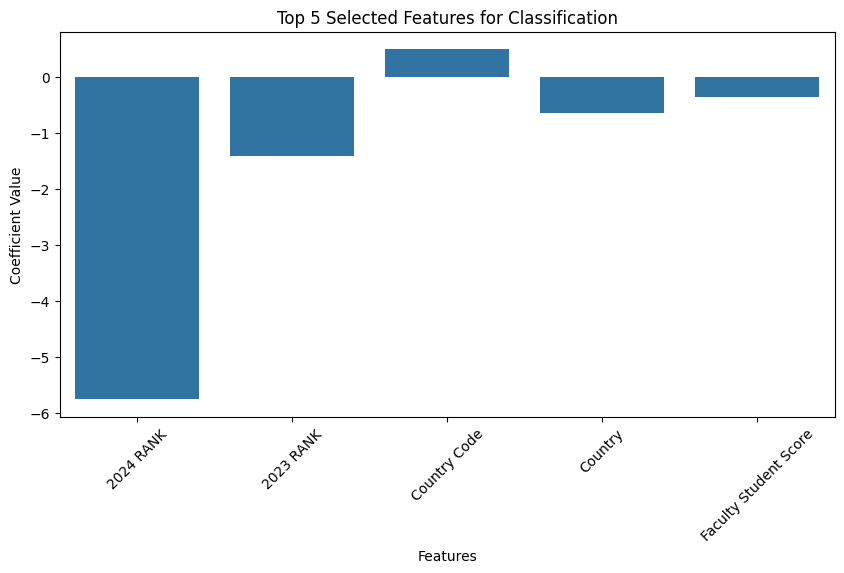

In [33]:
plt.figure(figsize=(10,5))
sns.barplot(x=selected_features_clf, y=rfe_clf.estimator_.coef_[0])
plt.xticks(rotation=45)
plt.title("Top 5 Selected Features for Classification")
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.show()


Feature Selection for Regression Task

In [32]:
# Feature Selection using RFE for Regression
rfe_reg = RFE(LinearRegression(), n_features_to_select=5)
rfe_reg.fit(X_train_reg, y_train_reg)

# Get selected features
selected_features_reg = X_regression.columns[rfe_reg.support_]
print("Selected Features for Regression:", selected_features_reg.tolist())


Selected Features for Regression: ['Academic Reputation Score', 'Academic Reputation Rank', 'Employer Reputation Rank', 'Citations per Faculty Score', 'Sustainability Score']


 Bar Plot: Feature Importance for Regression

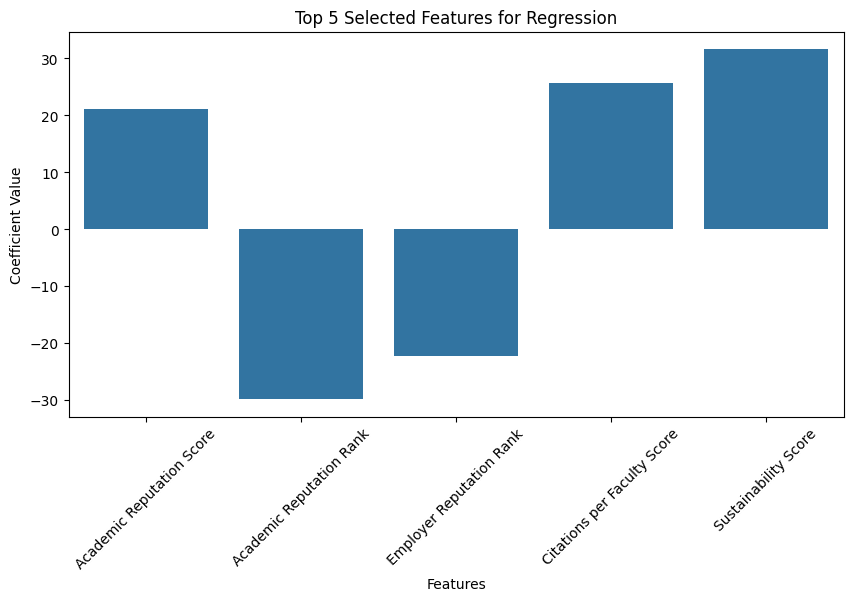

In [34]:
plt.figure(figsize=(10,5))
sns.barplot(x=selected_features_reg, y=rfe_reg.estimator_.coef_)
plt.xticks(rotation=45)
plt.title("Top 5 Selected Features for Regression")
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.show()


Final Model Evaluation

In [35]:
# Use selected features for classification and regression
X_train_clf_selected = X_train_clf[:, rfe_clf.support_]
X_test_clf_selected = X_test_clf[:, rfe_clf.support_]

X_train_reg_selected = X_train_reg[:, rfe_reg.support_]
X_test_reg_selected = X_test_reg[:, rfe_reg.support_]

print("Feature selection applied to training and testing datasets.")


Feature selection applied to training and testing datasets.


Classification Models (Using Selected Features)

In [36]:
# Retrain Logistic Regression
log_reg_selected = LogisticRegression()
log_reg_selected.fit(X_train_clf_selected, y_train_clf)
y_pred_log_selected = log_reg_selected.predict(X_test_clf_selected)

print("Logistic Regression Accuracy (After Feature Selection):", accuracy_score(y_test_clf, y_pred_log_selected))

# Retrain Decision Tree
decision_tree_selected = DecisionTreeClassifier()
decision_tree_selected.fit(X_train_clf_selected, y_train_clf)
y_pred_tree_selected = decision_tree_selected.predict(X_test_clf_selected)

print("Decision Tree Accuracy (After Feature Selection):", accuracy_score(y_test_clf, y_pred_tree_selected))

# Retrain Random Forest
random_forest_selected = RandomForestClassifier()
random_forest_selected.fit(X_train_clf_selected, y_train_clf)
y_pred_forest_selected = random_forest_selected.predict(X_test_clf_selected)

print("Random Forest Accuracy (After Feature Selection):", accuracy_score(y_test_clf, y_pred_forest_selected))


Logistic Regression Accuracy (After Feature Selection): 0.991869918699187
Decision Tree Accuracy (After Feature Selection): 1.0
Random Forest Accuracy (After Feature Selection): 1.0


Regression Models (Using Selected Features)


In [37]:
# Retrain Linear Regression
lin_reg_selected = LinearRegression()
lin_reg_selected.fit(X_train_reg_selected, y_train_reg)
y_pred_lin_selected = lin_reg_selected.predict(X_test_reg_selected)

print("Linear Regression R² Score (After Feature Selection):", r2_score(y_test_reg, y_pred_lin_selected))

# Retrain Decision Tree Regressor
decision_tree_reg_selected = DecisionTreeRegressor()
decision_tree_reg_selected.fit(X_train_reg_selected, y_train_reg)
y_pred_tree_reg_selected = decision_tree_reg_selected.predict(X_test_reg_selected)

print("Decision Tree R² Score (After Feature Selection):", r2_score(y_test_reg, y_pred_tree_reg_selected))

# Retrain Random Forest Regressor
random_forest_reg_selected = RandomForestRegressor()
random_forest_reg_selected.fit(X_train_reg_selected, y_train_reg)
y_pred_forest_reg_selected = random_forest_reg_selected.predict(X_test_reg_selected)

print("Random Forest R² Score (After Feature Selection):", r2_score(y_test_reg, y_pred_forest_reg_selected))


Linear Regression R² Score (After Feature Selection): 0.6471936949635371
Decision Tree R² Score (After Feature Selection): 0.7934351710466327
Random Forest R² Score (After Feature Selection): 0.8697496876666977


In [38]:
# Compare classification accuracy before and after feature selection
print("\nClassification Accuracy Comparison:")
print(f"Logistic Regression: Before = {accuracy_score(y_test_clf, y_pred_log)}, After = {accuracy_score(y_test_clf, y_pred_log_selected)}")
print(f"Decision Tree: Before = {accuracy_score(y_test_clf, y_pred_tree)}, After = {accuracy_score(y_test_clf, y_pred_tree_selected)}")
print(f"Random Forest: Before = {accuracy_score(y_test_clf, y_pred_forest)}, After = {accuracy_score(y_test_clf, y_pred_forest_selected)}")

# Compare regression R² scores before and after feature selection
print("\nRegression R² Score Comparison:")
print(f"Linear Regression: Before = {r2_score(y_test_reg, y_pred_lin)}, After = {r2_score(y_test_reg, y_pred_lin_selected)}")
print(f"Decision Tree: Before = {r2_score(y_test_reg, y_pred_tree_reg)}, After = {r2_score(y_test_reg, y_pred_tree_reg_selected)}")
print(f"Random Forest: Before = {r2_score(y_test_reg, y_pred_forest_reg)}, After = {r2_score(y_test_reg, y_pred_forest_reg_selected)}")



Classification Accuracy Comparison:
Logistic Regression: Before = 0.9878048780487805, After = 0.991869918699187
Decision Tree: Before = 1.0, After = 1.0
Random Forest: Before = 1.0, After = 1.0

Regression R² Score Comparison:
Linear Regression: Before = 0.8102721896082417, After = 0.6471936949635371
Decision Tree: Before = 0.9310961380615154, After = 0.7934351710466327
Random Forest: Before = 0.9289816604738411, After = 0.8697496876666977


Bar Chart: Classification Accuracy Before & After


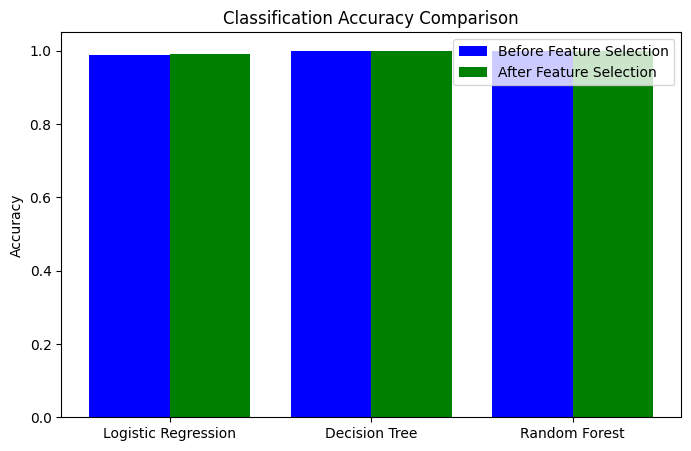

In [39]:
models = ["Logistic Regression", "Decision Tree", "Random Forest"]
before_acc = [accuracy_score(y_test_clf, y_pred_log), accuracy_score(y_test_clf, y_pred_tree), accuracy_score(y_test_clf, y_pred_forest)]
after_acc = [accuracy_score(y_test_clf, y_pred_log_selected), accuracy_score(y_test_clf, y_pred_tree_selected), accuracy_score(y_test_clf, y_pred_forest_selected)]

plt.figure(figsize=(8,5))
bar_width = 0.4
x_indexes = np.arange(len(models))

plt.bar(x_indexes, before_acc, width=bar_width, label="Before Feature Selection", color='blue')
plt.bar(x_indexes + bar_width, after_acc, width=bar_width, label="After Feature Selection", color='green')

plt.xticks(ticks=x_indexes + bar_width/2, labels=models)
plt.ylabel("Accuracy")
plt.title("Classification Accuracy Comparison")
plt.legend()
plt.show()


Line Plot: Regression R² Score Before & After


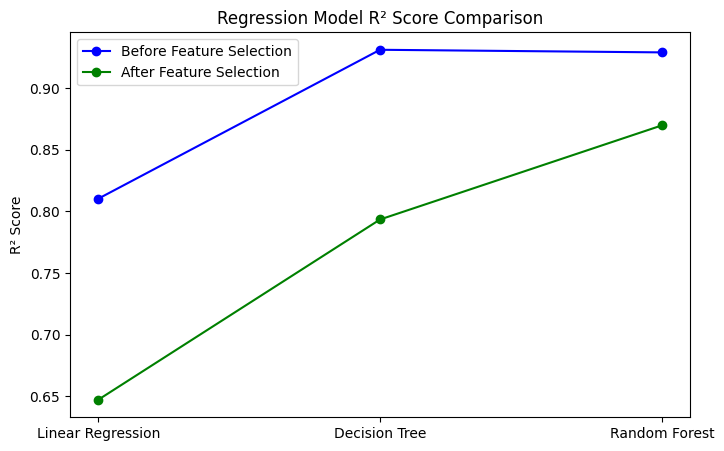

In [40]:
models = ["Linear Regression", "Decision Tree", "Random Forest"]
before_r2 = [r2_score(y_test_reg, y_pred_lin), r2_score(y_test_reg, y_pred_tree_reg), r2_score(y_test_reg, y_pred_forest_reg)]
after_r2 = [r2_score(y_test_reg, y_pred_lin_selected), r2_score(y_test_reg, y_pred_tree_reg_selected), r2_score(y_test_reg, y_pred_forest_reg_selected)]

plt.figure(figsize=(8,5))
plt.plot(models, before_r2, marker='o', linestyle='-', label="Before Feature Selection", color='blue')
plt.plot(models, after_r2, marker='o', linestyle='-', label="After Feature Selection", color='green')

plt.ylabel("R² Score")
plt.title("Regression Model R² Score Comparison")
plt.legend()
plt.show()


Final Report & Saving Models

In [46]:
# Final Report & Saving Models
import joblib

print("\n--- FINAL REPORT SUMMARY ---")

# Best classification model
best_clf = max(best_models_clf, key=lambda name: accuracy_score(y_test_clf, best_models_clf[name].predict(X_test_clf_selected)))
print(f"\nBest Classification Model: {best_clf}")
print("Accuracy:", accuracy_score(y_test_clf, best_models_clf[best_clf].predict(X_test_clf_selected)))
print("Selected Features for Classification:", selected_features_clf.tolist())

# Best regression model
best_reg = max(best_models_reg, key=lambda name: r2_score(y_test_reg, best_models_reg[name].predict(X_test_reg_selected)))
print(f"\nBest Regression Model: {best_reg}")
print("MSE:", mean_squared_error(y_test_reg, best_models_reg[best_reg].predict(X_test_reg_selected)))
print("R2 Score:", r2_score(y_test_reg, best_models_reg[best_reg].predict(X_test_reg_selected)))
print("Selected Features for Regression:", selected_features_reg.tolist())

print("\n--- END OF REPORT ---")

# Save best classification model
joblib.dump(best_models_clf[best_clf], "/content/drive/MyDrive/AI/best_classification_model.pkl")

# Save best regression model
joblib.dump(best_models_reg[best_reg], "/content/drive/MyDrive/AI/best_regression_model.pkl")

print("\nBest models saved successfully!")

# Save classification predictions
df_classification_results = pd.DataFrame({
    "Actual": y_test_clf,
    "Predicted": best_models_clf[best_clf].predict(X_test_clf_selected)
})
df_classification_results.to_csv("/content/drive/MyDrive/AI/classification_results.csv", index=False)

# Save regression predictions
df_regression_results = pd.DataFrame({
    "Actual": y_test_reg,
    "Predicted": best_models_reg[best_reg].predict(X_test_reg_selected)
})
df_regression_results.to_csv("/content/drive/MyDrive/AI/regression_results.csv", index=False)

print("\nPrediction results saved successfully!")



--- FINAL REPORT SUMMARY ---

Best Classification Model: DecisionTreeClassifier
Accuracy: 1.0
Selected Features for Classification: ['2024 RANK', '2023 RANK', 'Country Code', 'Country', 'Faculty Student Score']

Best Regression Model: RandomForestRegressor
MSE: 1274.7624508130082
R2 Score: 0.8642427323067075
Selected Features for Regression: ['Academic Reputation Score', 'Academic Reputation Rank', 'Employer Reputation Rank', 'Citations per Faculty Score', 'Sustainability Score']

--- END OF REPORT ---

Best models saved successfully!

Prediction results saved successfully!
